In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
mydf = pd.read_csv("schools_edfacts_assessments_2009.csv", compression='gzip')

In [3]:
mydf

,ncessch_num,year,school_name,leaid_num,lea_name,fips,grade_edfacts,race,sex,lep,...,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt,ncessch,leaid
0,10000500870,2009,Ala Avenue Middle Sch,100005,Albertville City,1,99,99,99,99,...,511.0,79.0,79.0,79.0,523.0,76.0,76.0,76.0,10000500870,100005
1,10000500870,2009,Ala Avenue Middle Sch,100005,Albertville City,1,99,5,99,99,...,1.0,-3.0,-3.0,-3.0,1.0,-3.0,-3.0,-3.0,10000500870,100005
2,10000500870,2009,Ala Avenue Middle Sch,100005,Albertville City,1,99,4,99,99,...,2.0,-3.0,-3.0,-3.0,2.0,-3.0,-3.0,-3.0,10000500870,100005
3,10000500870,2009,Ala Avenue Middle Sch,100005,Albertville City,1,99,2,99,99,...,10.0,50.0,100.0,75.0,10.0,50.0,100.0,75.0,10000500870,100005
4,10000500870,2009,Ala Avenue Middle Sch,100005,Albertville City,1,99,99,99,99,...,301.0,71.0,71.0,71.0,308.0,70.0,70.0,70.0,10000500870,100005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975608,720003002085,2009,JUAN QUIRINDONGO MORELL(SUPERIOR),7200030,PUERTO RICO DEPARTMENT OF EDUCATION,72,9,99,99,99,...,3.0,-3.0,-3.0,-3.0,3.0,-3.0,-3.0,-3.0,720003002085,7200030
3975609,720003002085,2009,JUAN QUIRINDONGO MORELL(SUPERIOR),7200030,PUERTO RICO DEPARTMENT OF EDUCATION,72,9,99,99,1,...,0.0,-2.0,-2.0,-2.0,0.0,-2.0,-2.0,-2.0,720003002085,7200030
3975610,720003002085,2009,JUAN QUIRINDONGO MORELL(SUPERIOR),7200030,PUERTO RICO DEPARTMENT OF EDUCATION,72,9,99,1,99,...,81.0,30.0,34.0,32.0,84.0,0.0,5.0,2.5,720003002085,7200030
3975611,720003002085,2009,JUAN QUIRINDONGO MORELL(SUPERIOR),7200030,PUERTO RICO DEPARTMENT OF EDUCATION,72,9,7,99,99,...,0.0,-2.0,-2.0,-2.0,0.0,-2.0,-2.0,-2.0,720003002085,7200030


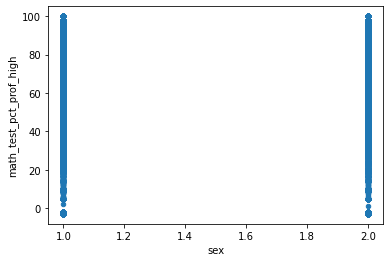

In [4]:
# create a histogram of all Male and female observatins

# can we do it without have
male_female_df = mydf[mydf["sex"] != 99]

#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

male_female_df.plot(kind='scatter', x='sex', y='math_test_pct_prof_high') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

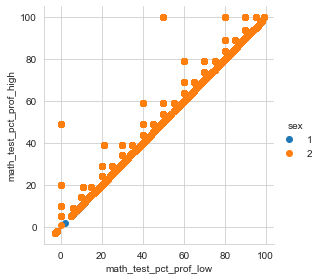

In [5]:
# 2-D Scatter plot with color-coding for each male type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(male_female_df, hue="sex", size=4) \
   .map(plt.scatter, "math_test_pct_prof_low", "math_test_pct_prof_high") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

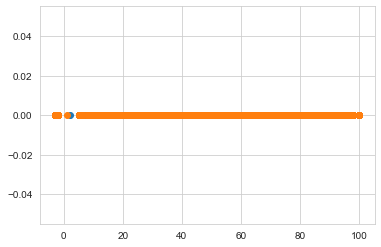

In [6]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
male_df = male_female_df.loc[male_female_df["sex"] == 1];
female_df = male_female_df.loc[male_female_df["sex"] == 2];


plt.plot(male_df["math_test_pct_prof_high"], np.zeros_like(male_df['math_test_pct_prof_high']), 'o')
plt.plot(female_df["math_test_pct_prof_high"], np.zeros_like(female_df['math_test_pct_prof_high']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

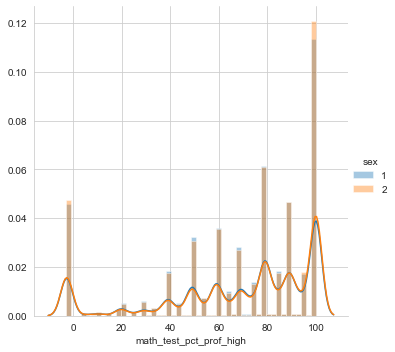

In [7]:
sns.FacetGrid(male_female_df, hue="sex", size=5) \
   .map(sns.distplot, "math_test_pct_prof_high") \
   .add_legend();
plt.show();


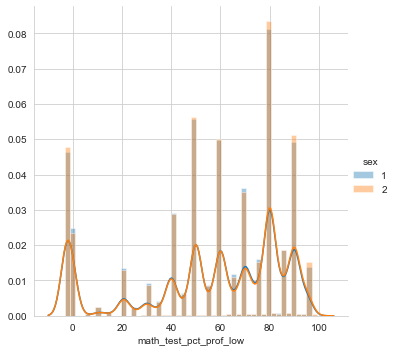

In [8]:
sns.FacetGrid(male_female_df, hue="sex", size=5) \
   .map(sns.distplot, "math_test_pct_prof_low") \
   .add_legend();
plt.show();


In [31]:
race_df = mydf[mydf["race"] != 99]


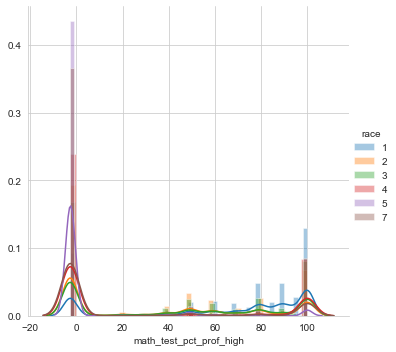

In [34]:
race_df['math_test_pct_prof_high'].dropna()

sns.FacetGrid(race_df, hue="race", size=5) \
   .map(sns.distplot, "math_test_pct_prof_high") \
   .add_legend();
plt.show();

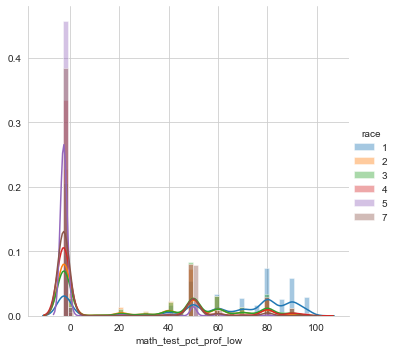

In [33]:
sns.FacetGrid(race_df, hue="race", size=5) \
   .map(sns.distplot, "math_test_pct_prof_low") \
   .add_legend();
plt.show();

[0.09814018 0.00565929 0.01949418 0.01922207 0.04866468 0.08168591
 0.15223602 0.15712847 0.13705571 0.28071347]
[ -3.    7.3  17.6  27.9  38.2  48.5  58.8  69.1  79.4  89.7 100. ]


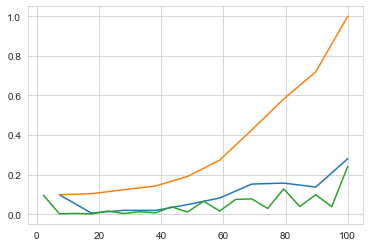

In [12]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(male_female_df['math_test_pct_prof_high'].dropna(), bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(male_female_df['math_test_pct_prof_high'].dropna(), bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.09657343 0.00579123 0.02021457 0.01999015 0.04980294 0.08375116
 0.15491269 0.15833105 0.13782364 0.27280913]
[ -3.    7.3  17.6  27.9  38.2  48.5  58.8  69.1  79.4  89.7 100. ]
[0.09972038 0.00552622 0.01876761 0.01844741 0.04751665 0.07960295
 0.1495364  0.15591557 0.1362812  0.2886856 ]
[ -3.    7.3  17.6  27.9  38.2  48.5  58.8  69.1  79.4  89.7 100. ]


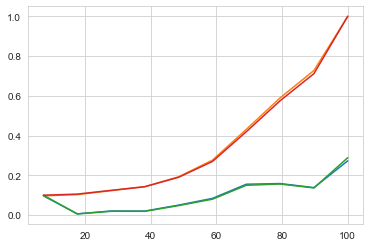

In [18]:
# Plots of CDF of petal_length for various types of flowers.




# male_df
counts, bin_edges = np.histogram(male_df['math_test_pct_prof_high'].dropna(), bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#female_df
counts, bin_edges = np.histogram(female_df['math_test_pct_prof_high'].dropna(), bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

Race stats:  99
[0.26611601 0.00804475 0.02641365 0.02159775 0.05047196 0.1009944
 0.12017063 0.11148656 0.08765055 0.20705374]
[ -3.    7.3  17.6  27.9  38.2  48.5  58.8  69.1  79.4  89.7 100. ]
Race stats:  5
[0.89626237 0.00093632 0.00371982 0.00216268 0.00642699 0.02603364
 0.01068621 0.00777549 0.001033   0.04496349]
[ -3.    7.3  17.6  27.9  38.2  48.5  58.8  69.1  79.4  89.7 100. ]
Race stats:  4
[6.84228121e-01 1.19117150e-04 9.22197289e-04 9.75992131e-04
 3.86170115e-03 1.44631275e-02 1.43632228e-02 2.23325443e-02
 1.33718607e-02 2.45362116e-01]
[ -3.    7.3  17.6  27.9  38.2  48.5  58.8  69.1  79.4  89.7 100. ]
Race stats:  2
[0.46480148 0.00593527 0.0182206  0.01648249 0.04063836 0.08909825
 0.09284113 0.07434072 0.03079232 0.16684937]
[ -3.    7.3  17.6  27.9  38.2  48.5  58.8  69.1  79.4  89.7 100. ]
Race stats:  3
[0.42439084 0.00545566 0.01605833 0.01718064 0.03827689 0.07529741
 0.08787036 0.07740174 0.04352367 0.21454447]
[ -3.    7.3  17.6  27.9  38.2  48.5  58.8  69.

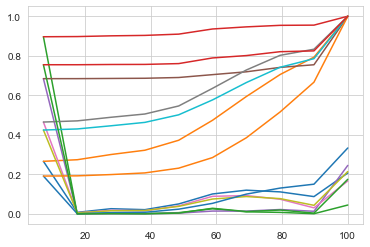

In [24]:
# Plots of CDF of petal_length for various types of flowers.
races = mydf["race"].unique()

for race in races:

    race_1_df = mydf[mydf["race"] == race]

    # race-1 
    counts, bin_edges = np.histogram(race_1_df['math_test_pct_prof_high'].dropna(), bins=10, 
                                     density = True)
    pdf = counts/(sum(counts))
    print("Race stats: ", race)
    print(pdf);
    print(bin_edges)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)




plt.show();

In [22]:
races = mydf["race"].unique()

print(races)

[99  5  4  2  3  1  7]


In [36]:
import sweetviz
import pandas as pd

In [38]:
import sweetviz as sv

my_report = sv.analyze(mydf)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
